<a href="https://colab.research.google.com/github/berrejebamen/berrejebamen/blob/main/Titanic_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

#Import Dependencies
%matplotlib inline
#Start Python Imports
import math , time , random , datetime
#Data manipulation
import numpy as np
import pandas as pd
#Visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')
#Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder , label_binarize
#Machine Learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection,tree,preprocessing,metrics,linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier , Pool,cv
#ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Import train & test data
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
gender_submission=pd.read_csv('gender_submission.csv')

In [5]:
#View the training data
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
len(train)

891

In [7]:
#view the test data
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [8]:
#view the gender_submission data
gender_submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [9]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

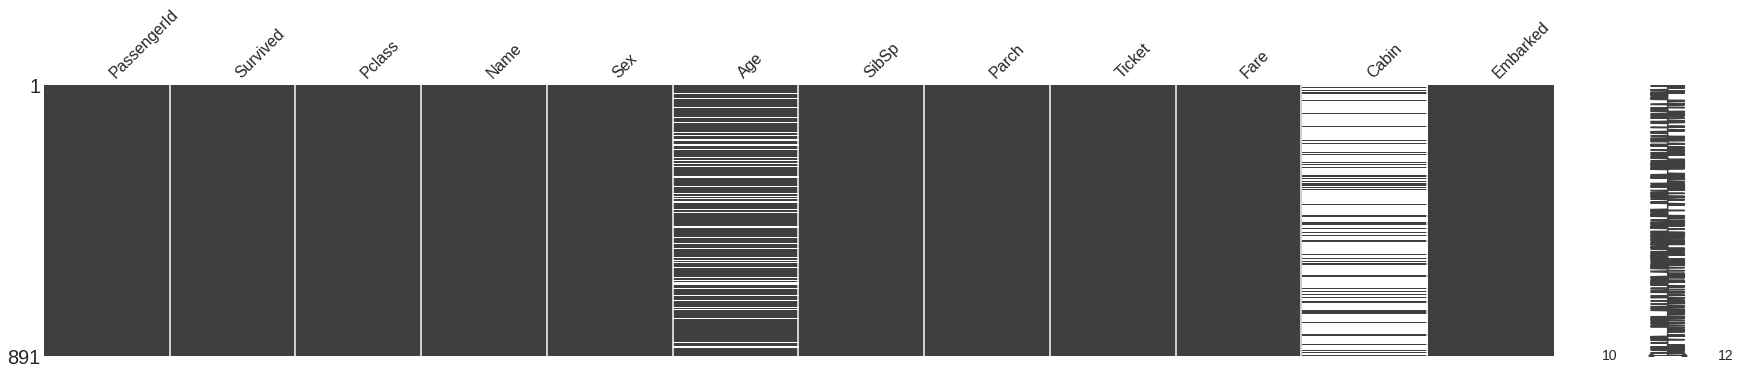

In [10]:
#plot graphics of missing data
missingno.matrix(train,figsize=(30,5))

In [11]:
train.columns
#we will need it

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
def find_missing_values(df,columns):
  missing_vals={}
  print('Numbers of missing or NaN values for each columns:')
  for c in columns:
    total_column_values=df[c].value_counts().sum()
    missing_vals[c]=len(df)-total_column_values
  return missing_vals
missing_values=find_missing_values(train,train.columns)
missing_values

Numbers of missing or NaN values for each columns:


{'Age': 177,
 'Cabin': 687,
 'Embarked': 2,
 'Fare': 0,
 'Name': 0,
 'Parch': 0,
 'PassengerId': 0,
 'Pclass': 0,
 'Sex': 0,
 'SibSp': 0,
 'Survived': 0,
 'Ticket': 0}

In [13]:
#let's create 2  new dataframes 
df_bin=pd.DataFrame()
df_con=pd.DataFrame()

In [14]:
#different data types in the dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

0    549
1    342
Name: Survived, dtype: int64


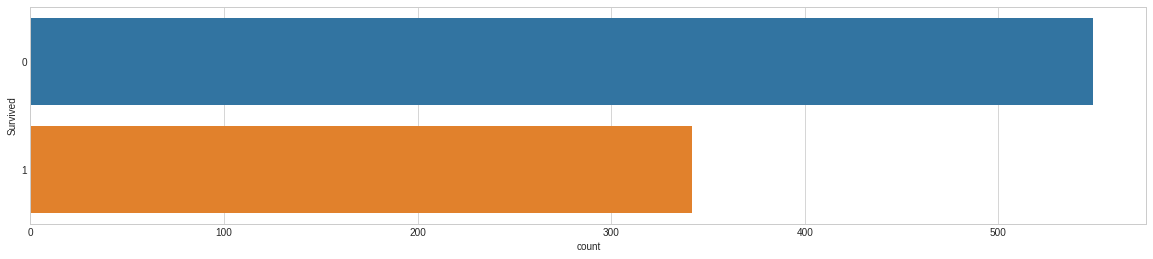

In [15]:
#how many people survived
fig=plt.figure(figsize=(20,4))
sns.countplot(y='Survived',data=train)
print(train.Survived.value_counts())

In [16]:
#let's add this to our subset dataframes
df_bin['Survived']=train['Survived']
df_con['Survived']=train['Survived']

In [17]:
df_bin.head()

Survived
0         0
1         1
2         1
3         1
4         0

In [18]:
df_con.head()

Survived
0         0
1         1
2         1
3         1
4         0

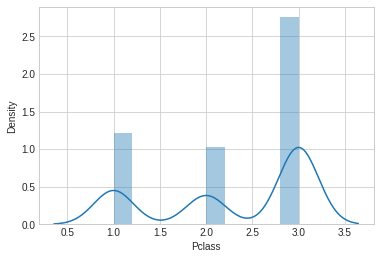

In [19]:
sns.distplot(train.Pclass)

In [20]:
#how many missing values in Pclass ?
missing_values['Pclass']

0

In [21]:
#so there is no missing values in Pclass we add it to our sub datasets
df_bin['Pclass']=train['Pclass']
df_con['Pclass']=train['Pclass']

In [22]:
df_bin.head()

Survived  Pclass
0         0       3
1         1       1
2         1       3
3         1       1
4         0       3

In [23]:
df_con.head()

Survived  Pclass
0         0       3
1         1       1
2         1       3
3         1       1
4         0       3

In [24]:
#how many different names are there
train.Name.value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

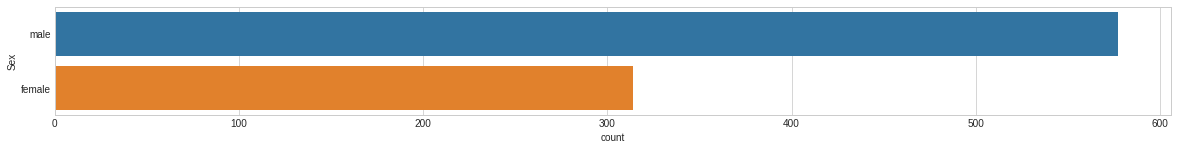

In [25]:
#let's view the distribution of sex
plt.figure(figsize=(20,2))
sns.countplot(y='Sex',data=train)

In [26]:
missing_values['Sex']

0

In [27]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [28]:
#Add sex to the subset dataframes

df_bin['Sex']=np.where(train['Sex'] == 'female',1,0)
df_con['Sex']=train['Sex']

In [29]:
df_bin.head()

Survived  Pclass  Sex
0         0       3    0
1         1       1    1
2         1       3    1
3         1       1    1
4         0       3    0

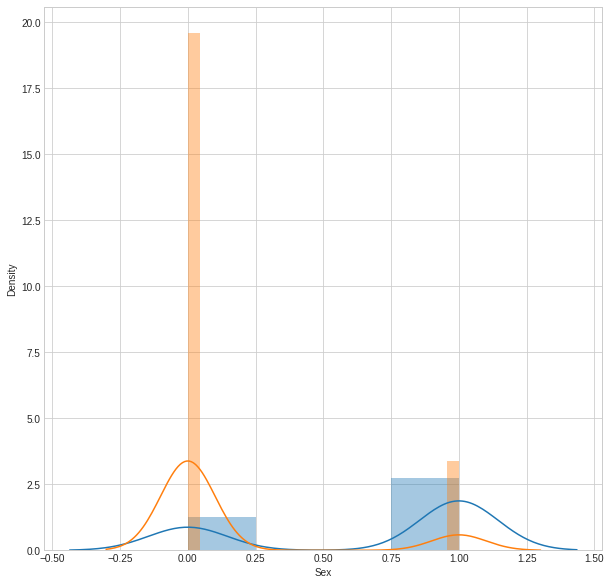

In [30]:

fig=plt.figure(figsize=(10,10))
sns.distplot(df_bin.loc[df_bin['Survived']==1]['Sex'],kde_kws={'label':'Survived'})
sns.distplot(df_bin.loc[df_bin['Survived']==0]['Sex'],kde_kws={'label':'Did not Survived'})

In [31]:
#how many missing values does age have ?
missing_values['Age']

177

In [32]:
def plot_counst_dist(data, bin_df, label_column , target_column , figsize=(20,5), use_bin_df=False):
  if use_bin_df:
    fig=plt.figure(figsize=figsize)
    plt.subplot(1,2,1)
    sns.countplot(y=target_column,data=bin_df)
    plt.subplot(1,2,2)
    sns.distplot(df_bin.loc[data[label_column]==1][target_column],kde_kws={'label':'Survived'});
    sns.distplot(df_bin.loc[data[label_column]==1][target_column],kde_kws={'label':'Did not Survived'});
  else:
    fig=plt.figure(figsize=figsize)
    plt.subplot(1,2,1)
    sns.countplot(y=target_column,data=bin_df)
    plt.subplot(1,2,2)
    sns.distplot(df_bin.loc[data[label_column]==1][target_column],kde_kws={'label':'Survived'});
    sns.distplot(df_bin.loc[data[label_column]==1][target_column],kde_kws={'label':'Did not Survived'});

In [33]:
#how many missing values  does SibSp have ?
missing_values['SibSp']

0

In [34]:
#what values do we have
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [35]:
#Add SibSp to subset dataframes
df_bin['SibSp']=train['SibSp']
df_con['SibSp']=train['SibSp']

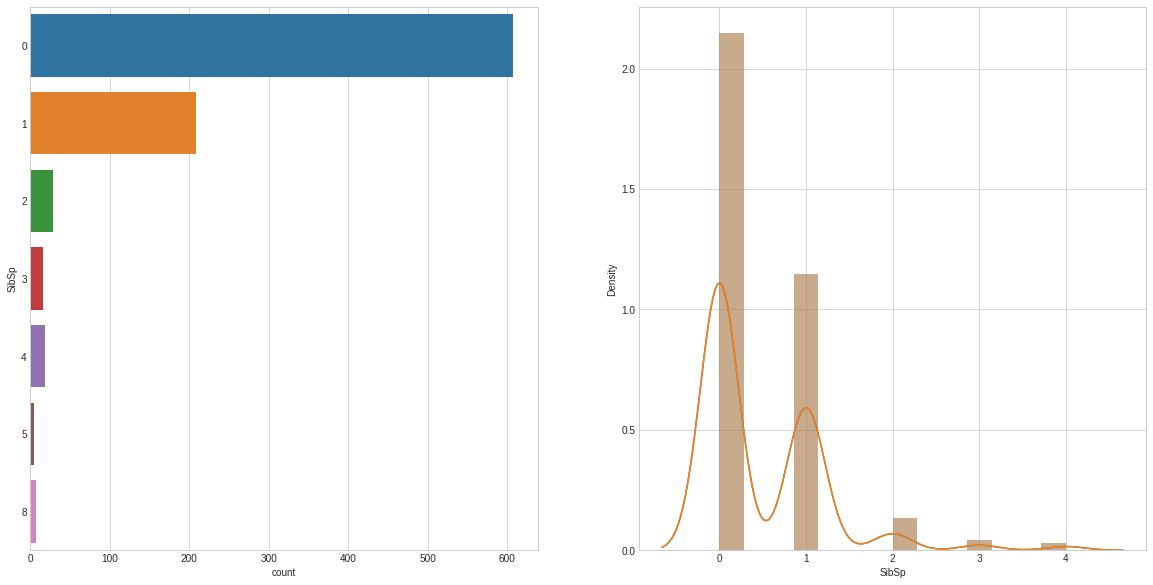

In [36]:
#visualise the counts of SibSp and the distributions of the values
#vs survived
plot_counst_dist(train, bin_df=df_bin , label_column='Survived',target_column='SibSp', figsize=(20,10) )

In [37]:
#How many missing values we have in Parch
missing_values['Parch']

0

In [38]:
#what values are there ?
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [39]:
#we add it to our subset dataframes
df_bin['Parch']=train['Parch']
df_con['Parch']=train['Parch']

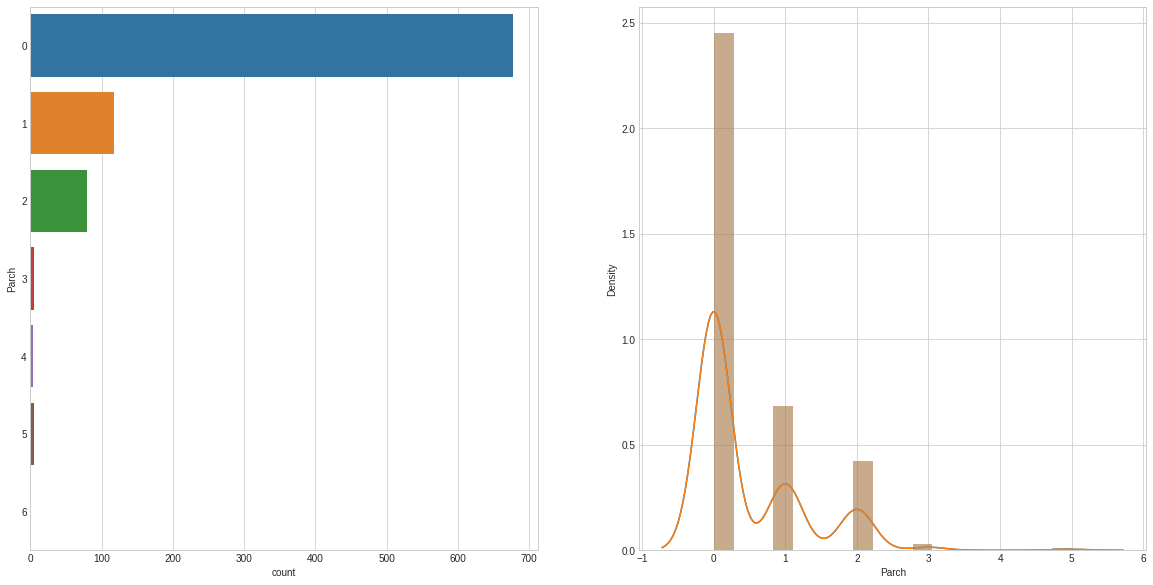

In [40]:
#visualise the counts of Parch and the distributions of the values
#vs survived
plot_counst_dist(train, bin_df=df_bin , label_column='Survived',target_column='Parch', figsize=(20,10))

In [41]:
df_con.head()

Survived  Pclass     Sex  SibSp  Parch
0         0       3    male      1      0
1         1       1  female      1      0
2         1       3  female      0      0
3         1       1  female      1      0
4         0       3    male      0      0

In [42]:
df_bin.head()

Survived  Pclass  Sex  SibSp  Parch
0         0       3    0      1      0
1         1       1    1      1      0
2         1       3    1      0      0
3         1       1    1      1      0
4         0       3    0      0      0

In [43]:
#How many missing values we have in Tickets
missing_values['Ticket']

0

In [44]:
#what values are there ?
train.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [45]:
#how many unique kinds of  unique Ticket  are there ?
print('There are {} unique Ticket values : ', format(len(train.Ticket.unique())))

There are {} unique Ticket values :  681


In [46]:
#How many missing values we have in Fare
missing_values['Fare']

0

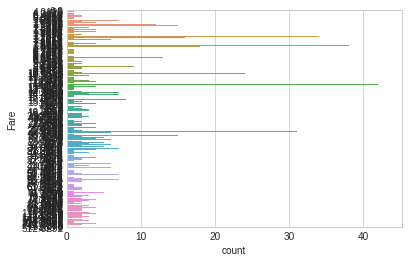

In [47]:
#how many different values of Fare  are there ?
sns.countplot(y='Fare',data=train)

In [48]:
#what kind of variables is Fare ?
train.Fare.dtype

dtype('float64')

In [49]:
#how many unique kinds of  unique Fare  are there ?
print('There are {} unique Fare values : ', format(len(train.Fare.unique())))

There are {} unique Fare values :  248


In [50]:
#Add Fare to our subset dataframes
df_con['Fare']=train['Fare']
df_bin['Fare']=pd.cut(train['Fare'],bins=5)#cuted to bins

In [51]:
df_bin.head()

Survived  Pclass  Sex  SibSp  Parch               Fare
0         0       3    0      1      0  (-0.512, 102.466]
1         1       1    1      1      0  (-0.512, 102.466]
2         1       3    1      0      0  (-0.512, 102.466]
3         1       1    1      1      0  (-0.512, 102.466]
4         0       3    0      0      0  (-0.512, 102.466]

In [52]:
df_con.head()

Survived  Pclass     Sex  SibSp  Parch     Fare
0         0       3    male      1      0   7.2500
1         1       1  female      1      0  71.2833
2         1       3  female      0      0   7.9250
3         1       1  female      1      0  53.1000
4         0       3    male      0      0   8.0500

In [53]:
#visualise the counts of the Fare bin counts and the distributions of the values
#vs survived
#plot_counst_dist(data=train, bin_df=df_bin , label_column='Survived', target_column='Fare', figsize=(20,10))

In [54]:
#How many missing values we have in Cabin
missing_values['Cabin']

687

In [55]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [56]:
#How many missing values we have in Embarked
missing_values['Embarked']

2

In [57]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

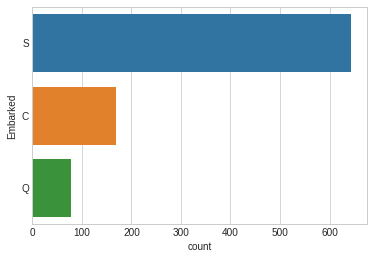

In [58]:
#what do counts look like ?
sns.countplot(y='Embarked',data=train)

In [59]:
#Add Embarked to our datasets
df_con['Embarked']=train['Embarked']
df_bin['Embarked']=train['Embarked']

In [60]:
df_bin.head()

Survived  Pclass  Sex  SibSp  Parch               Fare Embarked
0         0       3    0      1      0  (-0.512, 102.466]        S
1         1       1    1      1      0  (-0.512, 102.466]        C
2         1       3    1      0      0  (-0.512, 102.466]        S
3         1       1    1      1      0  (-0.512, 102.466]        S
4         0       3    0      0      0  (-0.512, 102.466]        S

In [61]:
df_con.head()

Survived  Pclass     Sex  SibSp  Parch     Fare Embarked
0         0       3    male      1      0   7.2500        S
1         1       1  female      1      0  71.2833        C
2         1       3  female      0      0   7.9250        S
3         1       1  female      1      0  53.1000        S
4         0       3    male      0      0   8.0500        S

In [62]:
one_hot_cols=df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_one=pd.get_dummies(df_bin,columns=one_hot_cols)
df_bin_one.head()

Survived  Pclass_1  Pclass_2  Pclass_3  Sex_0  Sex_1  SibSp_0  SibSp_1  \
0         0         0         0         1      1      0        0        1   
1         1         1         0         0      0      1        0        1   
2         1         0         0         1      0      1        1        0   
3         1         1         0         0      0      1        0        1   
4         0         0         0         1      1      0        1        0   

   SibSp_2  SibSp_3  ...  Parch_5  Parch_6  Fare_(-0.512, 102.466]  \
0        0        0  ...        0        0                       1   
1        0        0  ...        0        0                       1   
2        0        0  ...        0        0                       1   
3        0        0  ...        0        0                       1   
4        0        0  ...        0        0                       1   

   Fare_(102.466, 204.932]  Fare_(204.932, 307.398]  Fare_(307.398, 409.863]  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   Fare_(409.863, 512.329]  Embarked_C  Embarked_Q  Embarked_S  
0                        0           0           0           1  
1                        0           1           0           0  
2                        0           0           0           1  
3                        0           0           0           1  
4                        0           0           0           1  

[5 rows x 28 columns]

In [63]:
#label encode all continuos values using LabelEncoder()
df_con_one=df_con.apply(LabelEncoder().fit_transform)
df_con_one.head(15)

Survived  Pclass  Sex  SibSp  Parch  Fare  Embarked
0          0       2    1      1      0    18         2
1          1       0    0      1      0   207         0
2          1       2    0      0      0    41         2
3          1       0    0      1      0   189         2
4          0       2    1      0      0    43         2
5          0       2    1      0      0    51         1
6          0       0    1      0      0   186         2
7          0       2    1      3      1   124         2
8          1       2    0      0      2    74         2
9          1       1    0      1      0   154         0
10         1       2    0      1      1   110         2
11         1       0    0      0      0   143         2
12         0       2    1      0      0    43         2
13         0       2    1      1      5   158         2
14         0       2    0      0      0    36         2

In [64]:
#Start building machine learning models
#select the dataframe we want t use  for predictions
selected_df=df_con_one

In [65]:
selected_df.head()

Survived  Pclass  Sex  SibSp  Parch  Fare  Embarked
0         0       2    1      1      0    18         2
1         1       0    0      1      0   207         0
2         1       2    0      0      0    41         2
3         1       0    0      1      0   189         2
4         0       2    1      0      0    43         2

In [66]:
#split the data  into data and labels
x_train=selected_df.drop('Survived',axis=1)
y_train=selected_df.Survived

In [67]:
#see the shape of the data
x_train.shape

(891, 6)

In [68]:
#see the shape fo the labels
y_train.shape

(891,)

In [69]:
def fit_ml_algo(algo,x_train,y_train,cv):
  #One Pass
  model=algo.fit(x_train,y_train)
  acc=round(model.score(x_train,y_train)*100,2)
  #Cross Validation
  train_pred=model_selection.cross_val_predict(algo,x_train,y_train,cv=cv )
  #Cross Validation accuarcy metric
  acc_cv=round(metrics.accuracy_score(y_train,train_pred)*100,2)
  return train_pred ,acc, acc_cv

In [70]:
#Logistic Regression
start_time=time.time()
train_pred_log,acc_log,acc_cv_log=fit_ml_algo(LogisticRegression(),x_train,y_train,10)
log_time=time.time()-start_time
print('Accuracy (percent)',acc_log)
print('Accuracy for cross validation(percent)',acc_cv_log)
print('Runing Time',datetime.timedelta(seconds=log_time))

Accuracy (percent) 79.35
Accuracy for cross validation(percent) 78.23
Runing Time 0:00:00.343435


In [71]:
#K_Nearst neighbors 
tart_time=time.time()
train_pred_knn,acc_knn,acc_cv_knn=fit_ml_algo(KNeighborsClassifier(),x_train,y_train,10)
log_time=time.time()-start_time
print('Accuracy (percent)',acc_log)
print('Accuracy for cross validation(percent)',acc_cv_log)
print('Runing Time',datetime.timedelta(seconds=log_time))

Accuracy (percent) 79.35
Accuracy for cross validation(percent) 78.23
Runing Time 0:00:04.562294


In [72]:
#Gaussian Naive Bayes
start_time=time.time()
train_pred_gauss,acc_gauss,acc_cv_gauss=fit_ml_algo(GaussianNB(),x_train,y_train,10)
log_time=time.time()-start_time
print('Accuracy (percent)',acc_gauss)
print('Accuracy for cross validation(percent)',acc_cv_gauss)
print('Runing Time',datetime.timedelta(seconds=log_time))

Accuracy (percent) 76.88
Accuracy for cross validation(percent) 76.54
Runing Time 0:00:00.057745


In [73]:
#Linear support vector machines
start_time=time.time()
train_pred_svc,acc_svc,acc_cv_svc=fit_ml_algo(LinearSVC(),x_train,y_train,10)
log_time=time.time()-start_time
print('Accuracy (percent)',acc_svc)
print('Accuracy for cross validation(percent)',acc_cv_svc)
print('Runing Time',datetime.timedelta(seconds=log_time))

Accuracy (percent) 75.42
Accuracy for cross validation(percent) 69.47
Runing Time 0:00:00.445109


In [74]:
#Stochastic gradient descent
start_time=time.time()
train_pred_sgd,acc_sgd,acc_cv_sgd=fit_ml_algo(SGDClassifier(),x_train,y_train,10)
log_time=time.time()-start_time
print('Accuracy (percent)',acc_sgd)
print('Accuracy for cross validation(percent)',acc_cv_sgd)
print('Runing Time',datetime.timedelta(seconds=log_time))

Accuracy (percent) 50.51
Accuracy for cross validation(percent) 63.08
Runing Time 0:00:00.097326


In [75]:
#Decision Tree Classifier
start_time=time.time()
train_pred_dt,acc_dt,acc_cv_dt=fit_ml_algo(DecisionTreeClassifier(),x_train,y_train,10)
log_time=time.time()-start_time
print('Accuracy (percent)',acc_dt)
print('Accuracy for cross validation(percent)',acc_cv_dt)
print('Runing Time',datetime.timedelta(seconds=log_time))

Accuracy (percent) 92.48
Accuracy for cross validation(percent) 79.91
Runing Time 0:00:00.070927


In [76]:
#Gradient Boosting Trees
start_time=time.time()
train_pred_gbt,acc_gbt,acc_cv_gbt=fit_ml_algo(GradientBoostingClassifier(),x_train,y_train,10)
log_time=time.time()-start_time
print('Accuracy (percent)',acc_dt)
print('Accuracy for cross validation(percent)',acc_cv_gbt)
print('Runing Time',datetime.timedelta(seconds=log_time))

Accuracy (percent) 92.48
Accuracy for cross validation(percent) 81.26
Runing Time 0:00:01.344743


In [81]:
x_train.head()

Pclass  Sex  SibSp  Parch  Fare  Embarked
0       2    1      1      0    18         2
1       0    0      1      0   207         0
2       2    0      0      0    41         2
3       0    0      1      0   189         2
4       2    1      0      0    43         2

In [82]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [78]:
#define the catogrical features for the catboost
cat_features=np.where(x_train.dtypes != np.float)[0]
cat_features

array([0, 1, 2, 3, 4, 5])

In [80]:
#use the catboost Pool() function to pool together the training data and catgorical feature labels
train_pool=Pool(x_train,y_train,cat_features)

In [88]:
#Catboost model classification
catboost_model=CatBoostClassifier(iterations=1000,custom_loss=['Accuracy'],loss_function='Logloss')
#Fit Catboost model
catboost_model.fit(train_pool,plot=True)
#CatBoost accuarcy
acc_catboost=round(catboost_model.score(x_train,y_train)*100,2)
from google.colab import output
output.enable_custom_widget_manager()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009807
0:	learn: 0.6869516	total: 10.3ms	remaining: 10.2s
1:	learn: 0.6814760	total: 16.1ms	remaining: 8.02s
2:	learn: 0.6762493	total: 22.1ms	remaining: 7.34s
3:	learn: 0.6712542	total: 34.3ms	remaining: 8.53s
4:	learn: 0.6661279	total: 47.9ms	remaining: 9.54s
5:	learn: 0.6610513	total: 56.6ms	remaining: 9.37s
6:	learn: 0.6562242	total: 68.3ms	remaining: 9.69s
7:	learn: 0.6508479	total: 78.4ms	remaining: 9.72s
8:	learn: 0.6462524	total: 87.5ms	remaining: 9.64s
9:	learn: 0.6419088	total: 96.7ms	remaining: 9.58s
10:	learn: 0.6371361	total: 106ms	remaining: 9.54s
11:	learn: 0.6327361	total: 119ms	remaining: 9.82s
12:	learn: 0.6282292	total: 163ms	remaining: 12.4s
13:	learn: 0.6242407	total: 181ms	remaining: 12.7s
14:	learn: 0.6201086	total: 189ms	remaining: 12.4s
15:	learn: 0.6156806	total: 210ms	remaining: 12.9s
16:	learn: 0.6114554	total: 227ms	remaining: 13.1s
17:	learn: 0.6077339	total: 234ms	remaining: 12.8s
18:	learn: 0.6040260	total: 248ms	remaining: 12.8s
1

In [102]:
#Perform CatBoost cross-validation
start_time=time.time()
#Set parametrs for cross_validation as same as intial model
cv_params=catboost_model.get_params()
#Run the cross validation for 10-folds (same as other models)
cv_data=cv(train_pool,cv_params,fold_count=10,plot=True)
#how long did it take ?
catboost_time=time.time()-start_time
#Catboost CV results save into a dataframe (cv_data) ,let's withdraw the maximum accuracy score
acc_cv_catboost=round(np.max(cv_data['test-Accuracy-mean'])*100,2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
24:	learn: 0.4831763	test: 0.4600034	best: 0.4600034 (24)	total: 133ms	remaining: 5.18s
25:	learn: 0.4791610	test: 0.4550704	best: 0.4550704 (25)	total: 137ms	remaining: 5.13s
26:	learn: 0.4775969	test: 0.4525556	best: 0.4525556 (26)	total: 139ms	remaining: 5s
27:	learn: 0.4738424	test: 0.4492767	best: 0.4492767 (27)	total: 143ms	remaining: 4.97s
28:	learn: 0.4708228	test: 0.4467965	best: 0.4467965 (28)	total: 147ms	remaining: 4.91s
29:	learn: 0.4680586	test: 0.4436589	best: 0.4436589 (29)	total: 151ms	remaining: 4.88s
30:	learn: 0.4654614	test: 0.4413410	best: 0.4413410 (30)	total: 155ms	remaining: 4.85s
31:	learn: 0.4637671	test: 0.4398589	best: 0.4398589 (31)	total: 159ms	remaining: 4.82s
32:	learn: 0.4612945	test: 0.4379234	best: 0.4379234 (32)	total: 164ms	remaining: 4.81s
33:	learn: 0.4588618	test: 0.4352765	best: 0.4352765 (33)	total: 168ms	remaining: 4.78s
34:	learn: 0.4577562	test: 0.4345233	best: 0.

In [104]:
from google.colab import output
output.enable_custom_widget_manager()

In [105]:
from google.colab import output
output.disable_custom_widget_manager()

In [103]:
#Print out the CatBoost model metrics
print('----CatBoost Metrics-----')
print('Accuracy {}'.format(acc_catboost))
print('Accuracy CV {}'.format(acc_cv_catboost))
print('Running Time : {}'.format(datetime.timedelta(seconds=catboost_time)))

----CatBoost Metrics-----
Accuracy 87.32
Accuracy CV 81.71
Running Time : 0:01:17.101406


In [110]:
#Regular_accuarcy_score
models=pd.DataFrame({
    'Model':['KNN','Logistic Regression ','Naive Bayes' , 'Stochastic Gradient Descent ','Linear svc ','Decision Tree ','Gradient Boosting Trees','CatBoost'],
    'Score':[acc_knn,acc_log, acc_gauss, acc_sgd,acc_svc,acc_dt,acc_gbt,acc_catboost]
})
models.sort_values(by='Score',ascending=False)

Model  Score
5                Decision Tree   92.48
7                      CatBoost  87.32
6       Gradient Boosting Trees  86.98
0                           KNN  81.48
1          Logistic Regression   79.35
2                   Naive Bayes  76.88
4                   Linear svc   75.42
3  Stochastic Gradient Descent   50.51

In [111]:
#cross_validation score 
models=pd.DataFrame({
    'Model':['KNN','Logistic Regression ','Naive Bayes' , 'Stochastic Gradient Descent ','Linear svc ','Decision Tree ','Gradient Boosting Trees','CatBoost'],
    'Score':[acc_cv_knn,acc_cv_log, acc_cv_gauss, acc_cv_sgd,acc_cv_svc,acc_cv_dt,acc_cv_gbt,acc_cv_catboost]
})
models.sort_values(by='Score',ascending=False)

Model  Score
7                      CatBoost  81.71
6       Gradient Boosting Trees  81.26
5                Decision Tree   79.91
1          Logistic Regression   78.23
2                   Naive Bayes  76.54
0                           KNN  73.63
4                   Linear svc   69.47
3  Stochastic Gradient Descent   63.08

In [115]:
def feature_importance(model, data):
  fea_imp=pd.DataFrame({'imp':model.feature_importances_,'col':data.columns})
  fea_imp=fea_imp.sort_values(['imp','col'],ascending=[True,False]).iloc[-30:]
  fea_imp.plot(kind='barh',x='col',y='imp',figsize=(20,10))
  return fea_imp

imp       col
2   9.978724     SibSp
5  10.966548  Embarked
3  12.741196     Parch
4  16.875336      Fare
0  21.338106    Pclass
1  28.100089       Sex

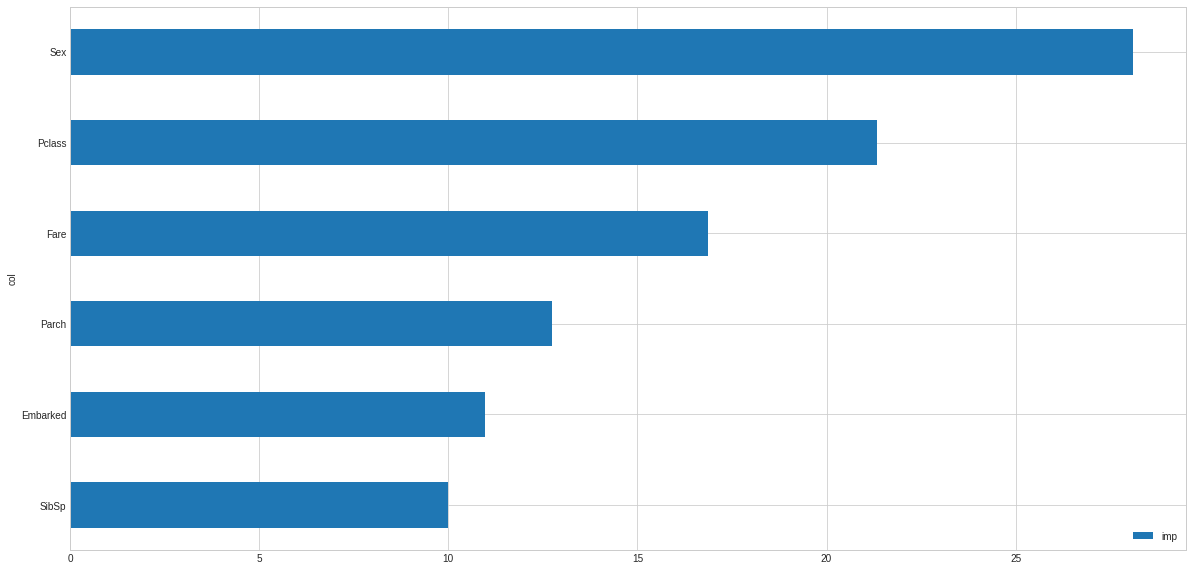

In [118]:
feature_importance(catboost_model,x_train)

In [123]:
metrics=['Precision','Recall','F1','AUC']
eval_metrics=catboost_model.eval_metrics(train_pool,metrics=metrics,plot=True)
for metric in metrics:
  print(str(metric)+': {}'.format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.9001878681557216
Recall: 0.697687134502924
F1: 0.7856122323953505
AUC: 0.9104296141842159


In [125]:
df_con_one.head()

Survived  Pclass  Sex  SibSp  Parch  Fare  Embarked
0         0       2    1      1      0    18         2
1         1       0    0      1      0   207         0
2         1       2    0      0      0    41         2
3         1       0    0      1      0   189         2
4         0       2    1      0      0    43         2

In [124]:
#Create a list of columns to be used for the predicitions
wanted_test_columns=df_con.drop('Survived',axis=1).columns
wanted_test_columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [127]:
#Make prediction using the CatBoost model for the wanted columns
predictions=catboost_model.predict(test[wanted_test_columns].apply(LabelEncoder().fit_transform))

In [128]:
#Our predictions array is comprised of 0's and 1's (Survived and Did not Survive)
predictions[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [129]:
#create a submission dataframe and append the relevant columns
submission=pd.DataFrame()
submission['PassengerId']=test['PassengerId']
submission['Survived']=predictions
submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0

In [132]:
#convert submission dataframe into csv for submission to csv
#for kaggle submission
submission.to_csv('submission.csv' , index=False)
print('Submission CSV is ready')


Submission CSV is ready


In [133]:
#check the submission
submission_check=pd.read_csv('submission.csv')
submission_check.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0